In [170]:
european_countries = [
    'Albania', 'Andorra', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 
    'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 
    'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein',
    'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Montenegro', 'Netherlands', 
    'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 
    'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom'
]
american_countries = [
    'Argentina', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Ecuador', 
    'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Panama', 'Paraguay', 'Peru', 'United States', 'Uruguay', 'Venezuela'
]

In [171]:
import pandas as pd

file_path = '..\data\hdi\hdr-data.json'
data = pd.read_json(file_path)

In [172]:
from matplotlib.colors import to_rgba
desaturated_red = to_rgba("indianred", alpha=0.45)  # Colore rosso desaturato
desaturated_green = to_rgba("lightblue", alpha=0.75)  # Colore verde/blu chiaro
desaturated_gray = to_rgba("gray", alpha=0.6) 

C:\Users\Giovanni\AppData\Local\Temp\ipykernel_924\37471346.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




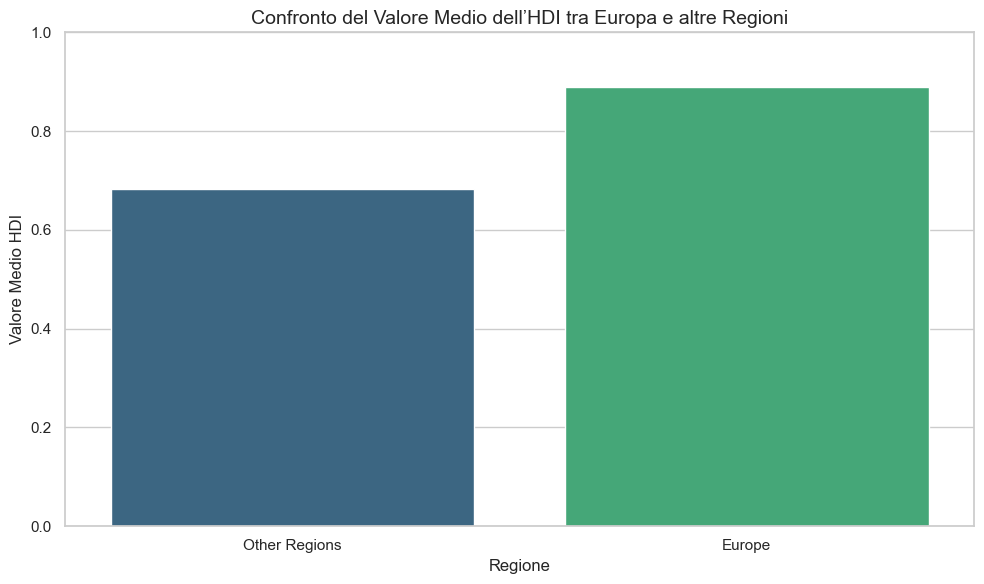

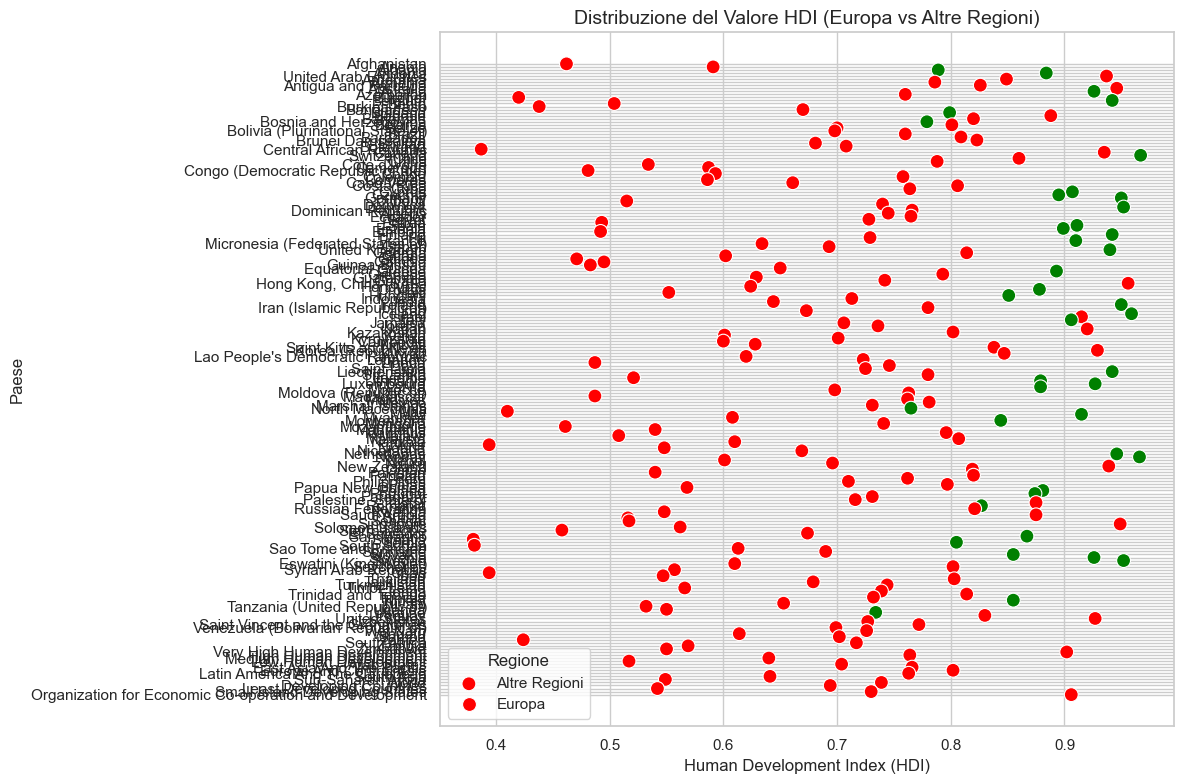

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

data['is_europe'] = data['country'].apply(lambda x: x in european_countries)

# Calcolo del valore medio dell'HDI per i paesi europei e non europei
average_hdi = data.groupby('is_europe')['value'].mean().reset_index()
average_hdi['region'] = average_hdi['is_europe'].map({True: 'Europe', False: 'Other Regions'})

# Grafico 1: Confronto del valore medio dell'HDI
plt.figure(figsize=(10, 6))
sns.barplot(data=average_hdi, x='region', y='value', palette='viridis')
plt.title('Confronto del Valore Medio dell’HDI tra Europa e altre Regioni', fontsize=14)
plt.xlabel('Regione', fontsize=12)
plt.ylabel('Valore Medio HDI', fontsize=12)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('hdi_comparison.png', dpi=300, transparent=True)
plt.show()

# Grafico 2: Grafico a dispersione per evidenziare paesi europei
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='value', y='country', hue='is_europe', palette={True: 'green', False: 'red'}, s=100)
plt.title('Distribuzione del Valore HDI (Europa vs Altre Regioni)', fontsize=14)
plt.xlabel('Human Development Index (HDI)', fontsize=12)
plt.ylabel('Paese', fontsize=12)
plt.legend(title='Regione', labels=['Altre Regioni', 'Europa'])
plt.tight_layout()
plt.show()


C:\Users\Giovanni\AppData\Local\Temp\ipykernel_924\2273027609.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




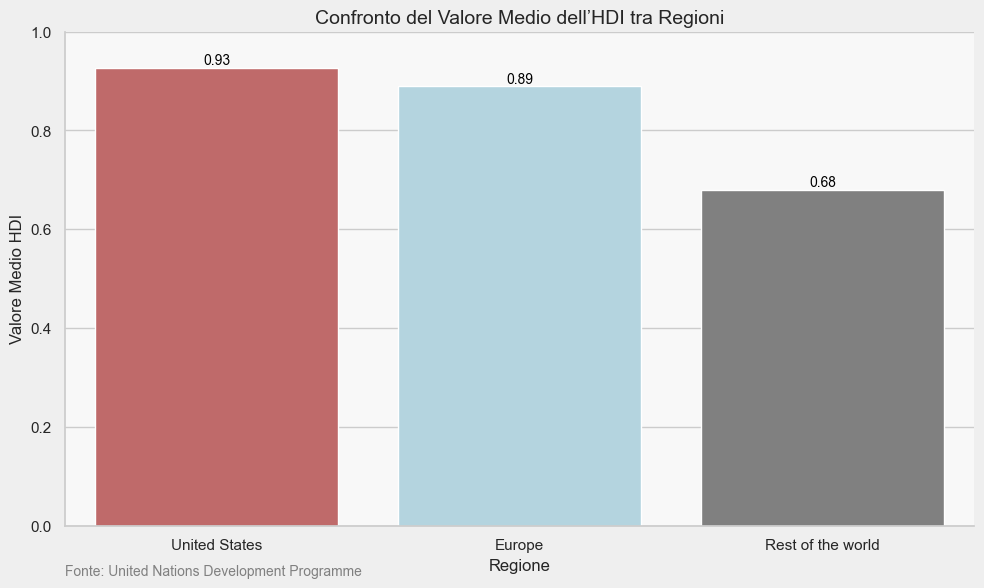

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

def classify_region(country):
    if country in european_countries:
        return 'Europe'
    elif country == 'United States':
        return 'United States'
    else:
        return 'Rest of the world'

data['region'] = data['country'].apply(classify_region)

# Calcolo del valore medio dell'HDI per le regioni
average_hdi = data.groupby('region')['value'].mean().sort_values(ascending=False).reset_index()

# Grafico: Confronto del valore medio dell'HDI per Europa, Americhe e altre regioni
plt.figure(figsize=(10, 6))
sns.barplot(data=average_hdi, x='region', y='value', palette={'Europe': desaturated_green, 'United States': desaturated_red, 'Rest of the world': desaturated_gray})
plt.title('Confronto del Valore Medio dell’HDI tra Regioni', fontsize=14)
plt.xlabel('Regione', fontsize=12)
plt.ylabel('Valore Medio HDI', fontsize=12)
plt.ylim(0, 1)
plt.tight_layout()

ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Aggiungi i valori sopra le barre
for bar in ax.patches:
    ax.annotate(
        format(bar.get_height(), '.2f'),  # Testo da mostrare (valore con 2 decimali)
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Posizione del testo
        ha='center',  # Allineamento orizzontale
        va='bottom',  # Allineamento verticale
        fontsize=10,  # Dimensione del testo
        color='black'  # Colore del testo
    )


plt.gcf().set_facecolor("#efefef")
plt.gca().set_facecolor("#f8f8f8")

plt.text(
    0, -0.1,  # Posizione
    "Fonte: United Nations Development Programme",
    fontsize=10,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)


plt.show()


C:\Users\Giovanni\AppData\Local\Temp\ipykernel_924\1824964711.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




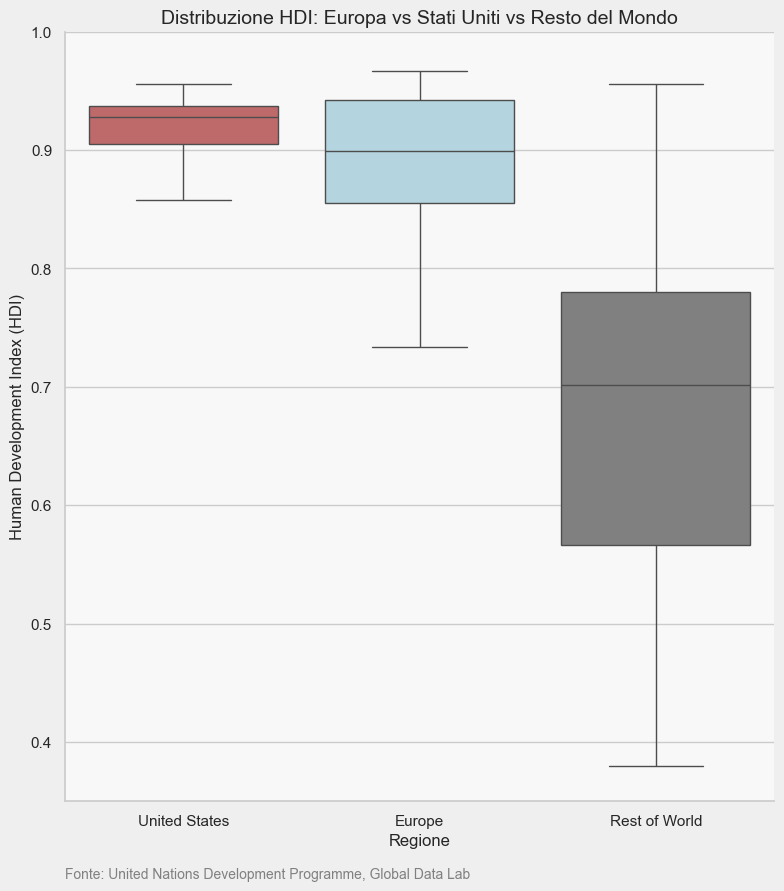

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Percorso ai file (modificali se necessario)
json_file_path = '../data/hdi/hdr-data.json'
us_file_path = '../data/hdi/GDL-Subnational-HDI-data.csv'

def classify_region(country):
    if country in european_countries:
        return 'Europe'
    elif country == 'United States':
        return 'United States'
    else:
        return 'Rest of World'

# Caricamento dati globali
data = pd.read_json(json_file_path)
data['region'] = data['country'].apply(classify_region)

# Europa a livello nazionale
europe_data = data[data['region'] == 'Europe'].copy()

# Resto del mondo
rest_data = data[data['region'] == 'Rest of World'].copy()

# Caricamento dati sub-nazionali degli Stati Uniti
us_data = pd.read_csv(us_file_path)
us_data = us_data[(us_data['Country'] == 'United States') & (us_data['Level'] == 'Subnat')].copy()
us_data['value'] = us_data['2022']
us_data['region'] = 'United States'

# Combina i dati
combined_data = pd.concat([
    europe_data[['region', 'value']], 
    us_data[['region', 'value']], 
    rest_data[['region', 'value']]
], ignore_index=True)

# Boxplot
plt.figure(figsize=(8, 9))
sns.boxplot(data=combined_data, x='region', y='value', 
            order=['United States', 'Europe', 'Rest of World'],
            palette={'United States': desaturated_red, 'Europe': desaturated_green, 'Rest of World': desaturated_gray})
plt.title('Distribuzione HDI: Europa vs Stati Uniti vs Resto del Mondo', fontsize=14)
plt.xlabel('Regione', fontsize=12)
plt.ylabel('Human Development Index (HDI)', fontsize=12)
plt.ylim(0.35, 1)

ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.gcf().set_facecolor("#efefef")
plt.gca().set_facecolor("#f8f8f8")

plt.text(
    0, -0.1,  # Posizione
    "Fonte: United Nations Development Programme, Global Data Lab",
    fontsize=10,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)


plt.tight_layout()
plt.show()


C:\Users\Giovanni\AppData\Local\Temp\ipykernel_924\2761461365.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




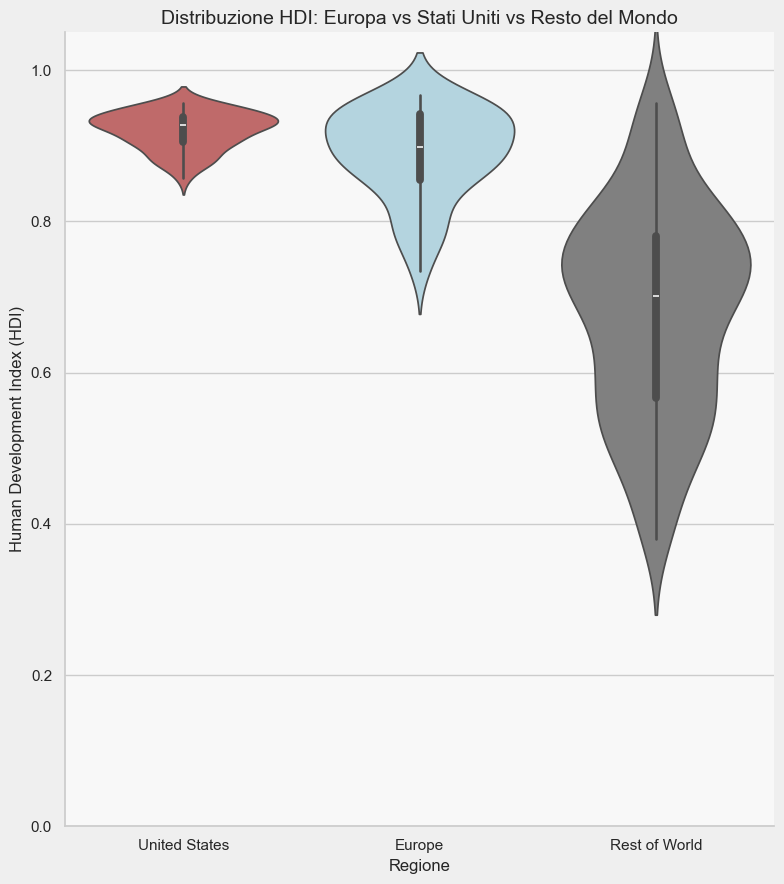

In [176]:
# Violinplot
plt.figure(figsize=(8, 9))
sns.violinplot(data=combined_data, x='region', y='value', 
               order=['United States', 'Europe', 'Rest of World'],
            palette={'United States': desaturated_red, 'Europe': desaturated_green, 'Rest of World': desaturated_gray})
plt.title('Distribuzione HDI: Europa vs Stati Uniti vs Resto del Mondo', fontsize=14)
plt.xlabel('Regione', fontsize=12)
plt.ylabel('Human Development Index (HDI)', fontsize=12)
plt.ylim(0, 1.05)

ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.gcf().set_facecolor("#efefef")
plt.gca().set_facecolor("#f8f8f8")

plt.tight_layout()
plt.show()

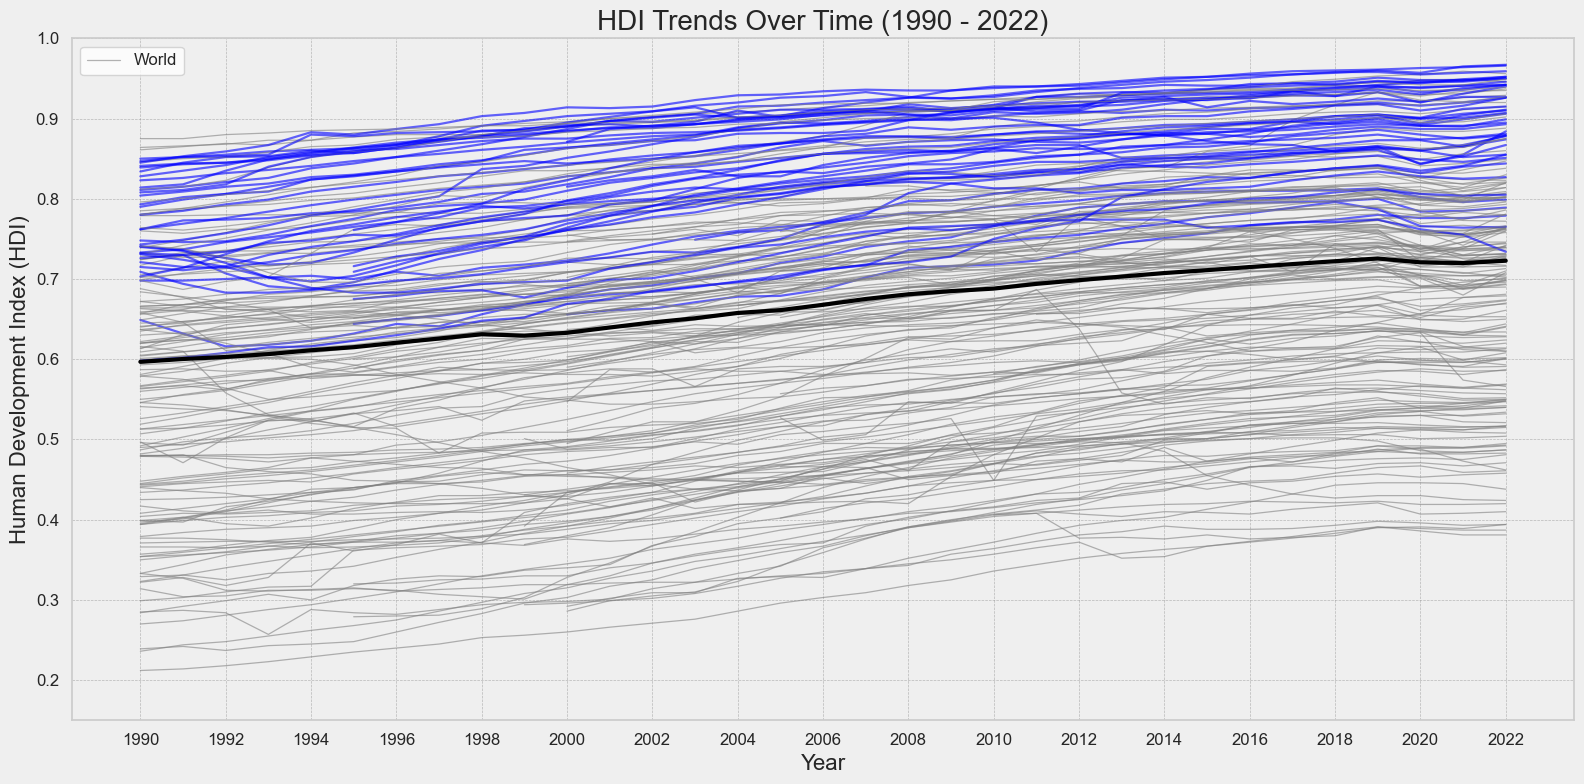

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '..\data\hdi\hdr-data-storico.json'
data = pd.read_json(file_path)

# Filtra i dati rilevanti
data = data[['country', 'year', 'value']]

# Configura lo stile del grafico
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Disegna le linee per ciascun paese
countries = data['country'].unique()
for country in countries:
    country_data = data[data['country'] == country]
    if country in european_countries:
        # Linee evidenziate in blu per i paesi europei
        plt.plot(country_data['year'], country_data['value'], color='blue', alpha=0.6, linewidth=1.6, label=country if country == 'France' else None)
    else:
        # Linee neutre per tutti gli altri
        plt.plot(country_data['year'], country_data['value'], color='gray', alpha=0.6, linewidth=0.9)

# Calcola la media globale (aggiunta della linea "World")
world_avg = data.groupby('year')['value'].mean()
plt.plot(world_avg.index, world_avg.values, color='black', label='World', linewidth=3)

# Aggiungi etichette e titolo
plt.title('HDI Trends Over Time (1990 - 2022)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Human Development Index (HDI)', fontsize=16)

# Configura i ticks dell'asse X per mostrare gli anni ogni due
xticks = list(range(int(data['year'].min()), int(data['year'].max()) + 1, 2))
plt.xticks(xticks, fontsize=12)

plt.yticks(fontsize=12)
plt.ylim(0.15, 1)

plt.legend(['World'], loc='upper left', fontsize=12)

# Migliora lo stile
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.gcf().set_facecolor("#efefef")
plt.gca().set_facecolor("#efefef")

# Salva e mostra il grafico
plt.tight_layout()
plt.show()


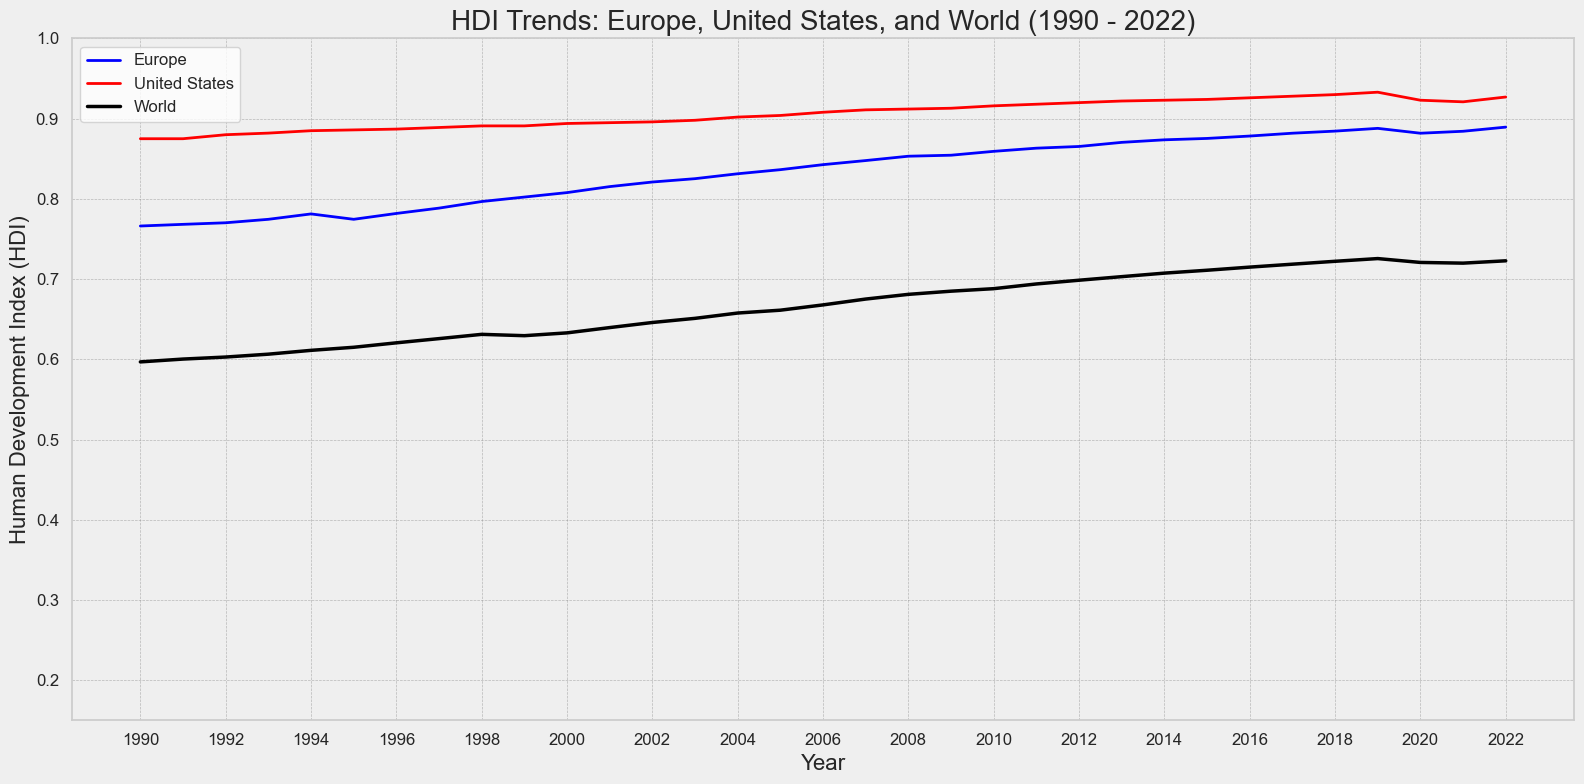

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '..\data\hdi\hdr-data-storico.json'
data = pd.read_json(file_path)

# Lista dei paesi europei
european_countries = [
    'Albania', 'Andorra', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 
    'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 
    'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein',
    'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Montenegro', 'Netherlands', 
    'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 
    'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom'
]

# Filtra i dati rilevanti
data = data[['country', 'year', 'value']]

# Calcola la media per Europa
europe_data = data[data['country'].isin(european_countries)]
europe_avg = europe_data.groupby('year')['value'].mean()

# Calcola i dati per gli Stati Uniti
usa_data = data[data['country'] == 'United States']

# Calcola la media globale (World)
world_avg = data.groupby('year')['value'].mean()

# Configura lo stile del grafico
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Disegna la media europea (blu)
plt.plot(europe_avg.index, europe_avg.values, color='blue', linewidth=2, label='Europe')

# Disegna la linea degli Stati Uniti (rosso)
if not usa_data.empty:
    plt.plot(usa_data['year'], usa_data['value'], color='red', linewidth=2, label='United States')

# Disegna la media globale (nero)
plt.plot(world_avg.index, world_avg.values, color='black', linewidth=2.5, label='World')

# Aggiungi etichette e titolo
plt.title('HDI Trends: Europe, United States, and World (1990 - 2022)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Human Development Index (HDI)', fontsize=16)

# Configura i ticks dell'asse X per mostrare gli anni ogni due
xticks = list(range(int(data['year'].min()), int(data['year'].max()) + 1, 2))
plt.xticks(xticks, fontsize=12)

plt.yticks(fontsize=12)
plt.ylim(0.15, 1)

# Aggiungi la legenda
plt.legend(loc='upper left', fontsize=12)

# Migliora lo stile del grafico
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.gcf().set_facecolor("#efefef")
plt.gca().set_facecolor("#efefef")

# Salva e mostra il grafico
plt.tight_layout()
plt.show()


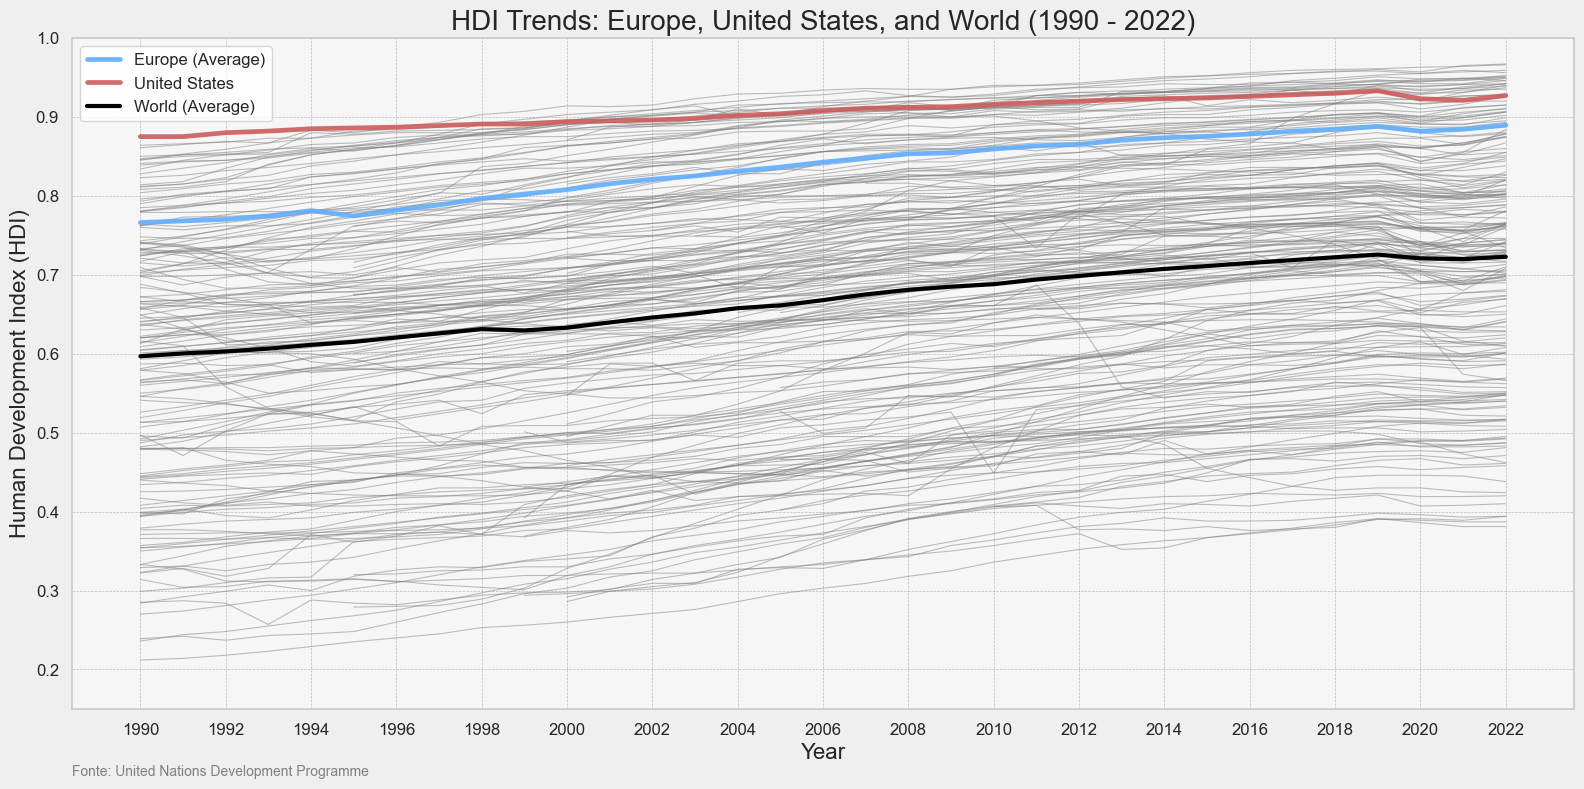

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '..\data\hdi\hdr-data-storico.json'
data = pd.read_json(file_path)

# Lista dei paesi europei
european_countries = [
    'Albania', 'Andorra', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 
    'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 
    'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein',
    'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Montenegro', 'Netherlands', 
    'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 
    'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom'
]

# Filtra i dati rilevanti
data = data[['country', 'year', 'value']]

# Calcola la media per Europa
europe_data = data[data['country'].isin(european_countries)]
europe_avg = europe_data.groupby('year')['value'].mean()

# Calcola i dati per gli Stati Uniti
usa_data = data[data['country'] == 'United States']

# Calcola la media globale (World)
world_avg = data.groupby('year')['value'].mean()

# Configura lo stile del grafico
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Disegna le linee per ciascun paese
countries = data['country'].unique()
for country in countries:
    country_data = data[data['country'] == country]
    if country in european_countries:
        # Linee evidenziate in grigio chiaro per i paesi europei
        plt.plot(country_data['year'], country_data['value'], color='gray', alpha=0.5, linewidth=0.8)
    elif country == 'United States':
        continue  # La linea USA sarà aggiunta separatamente
    else:
        # Linee neutre per tutti gli altri paesi
        plt.plot(country_data['year'], country_data['value'], color='gray', alpha=0.5, linewidth=0.8)

# Disegna la media europea (blu)
plt.plot(europe_avg.index, europe_avg.values, color='#5fadff', alpha=0.9, linewidth=3.4, label='Europe (Average)')

# Disegna la linea degli Stati Uniti (rosso)
if not usa_data.empty:
    plt.plot(usa_data['year'], usa_data['value'], color='indianred', alpha=0.9, linewidth=3.4, label='United States')

# Disegna la media globale (nero)
plt.plot(world_avg.index, world_avg.values, color='black', linewidth=3, label='World (Average)')

# Aggiungi etichette e titolo
plt.title('HDI Trends: Europe, United States, and World (1990 - 2022)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Human Development Index (HDI)', fontsize=16)

# Configura i ticks dell'asse X per mostrare gli anni ogni due
xticks = list(range(int(data['year'].min()), int(data['year'].max()) + 1, 2))
plt.xticks(xticks, fontsize=12)

plt.yticks(fontsize=12)
plt.ylim(0.15, 1)

# Aggiungi la legenda
plt.legend(loc='upper left', fontsize=12)

# Migliora lo stile del grafico
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.gcf().set_facecolor("#efefef")
plt.gca().set_facecolor("#f6f6f6")

plt.text(
    0, -0.1,  # Posizione
    "Fonte: United Nations Development Programme",
    fontsize=10,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)

custom_legend_order = ['United States', 'Europe (Average)', 'World (Average)']
handles, labels = plt.gca().get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: custom_legend_order.index(x[1]))
handles, labels = zip(*sorted_handles_labels)

# Aggiungi la legenda con l'ordine personalizzato
plt.legend(handles, labels, loc='upper left', fontsize=12)

# Salva e mostra il grafico
plt.tight_layout()
plt.show()
